<h1><b>Exercise 1</b></h1>
<p>A collection of points is being called a part, and each part will be stored in a numpy array that will be treated as a matrix. Each part will be stored in a list, so part 1's collection of points will be accessess by parts[0].<br>Each part will have the linear transformation A applied to it so that all of its points have been transformed. The resulting points will then be plotted side-by-side to show a before and after.</p>

In [530]:
# import the following packages into the namespace
import numpy as np
import matplotlib.pyplot as plt
# inline figures
%matplotlib inline


In [531]:
# Initial Conditions and Variable Assignments
a = 4
b = 3

parts = [np.array([
    [a, a, -a, -a, a],
    [a, -a, -a, a, a]
]), np.array([
    [1-a, -a/4, -a/4, 1-a, 1-a],
    [a-1, a-1, a/2, a/2, a-1]
]), np.array([
    [a/4, a-1, a-1, a/4],
    [a-1, a/2, a-1, a/2]
]), np.array([
    [a-1, a-1, 1-a, 1-a],
    [-a/4, -a/2, -a/2, -a/4]
])]

A = 1/b * np.array([
    [b, 1],
    [-1, 1]
])

In [532]:
# Apply the transformation matrix to all the points in each part
transformed_parts = []
for part in parts:
    transformed_parts.append(np.matmul(A, part))

In [533]:
def plot_points(axis, title, parts):
    '''
    Will plot the given points on the given axis with the given title

    Paramters:
    ----------
    axis:
        - The axis for the subplot to plot the points onto
    
    title:
        - The title to give the subplot

    parts:
        - A list of parts where each part is the points stored in a matrix
    '''
    # Limit the axis so they are equal for both subplots
    axis.set_xlim([-a-2, a+2])
    axis.set_ylim([-a-1, a+1])
    # Set a title for the subplot
    axis.set_title(title)

    # For each of the parts
    for num, part in enumerate(parts):
        # Transpose so that each row is an x and y coord
        transposed = part.T
        # If it is part 3
        if num == 2: # Because part 3 has a line break
            # For each of the 4 points plot a line between them
            for i in range(0, 4, 1):
                if i == 1: # Is it the one that needs the line break? - if so, skip
                    continue
                axis.plot(transposed[:, 0][i:i+2], transposed[:, 1][i:i+2], 'r')
        else:
            # For each of the 4 points plot a line between them
            for i in range(0, 4, 1):
                axis.plot(transposed[:, 0][i:i+2], transposed[:, 1][i:i+2], 'r')

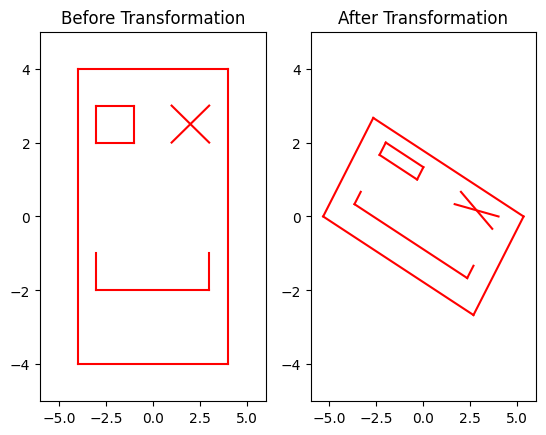

In [534]:
# Plot the parts
figure, axis = plt.subplots(1, 2)

plot_points(axis[0], "Before Transformation", parts)
plot_points(axis[1], "After Transformation", transformed_parts)
    
plt.show()

<h2>Explanation of results</h2>
<p>As you can see by the before transformation plot, the collection of points create a smiley face where one eye is a cross. <br>
The matrix A defines a linear transformation that will scale and shear the input points. The x-cordinates for each point will be scaled by a factor <i>b</i> and the y-coordinate will be sheared by subtracting a the x-coordinate scaled by 1/<i>b</i></p>

<h1><b>Exercise 2</b></h1>

In [535]:
# Initial Conditions
x0 = 0
y0 = -3

In [536]:
# Define Functions
def gradient(x, y):
    '''
    Evaluates a gradient at a point

    Parameters:
    -----------
    x:
        - x value to evaluate the gradient at
    y:
        - y value to evaluate the gradient at

    Returns:
    ---------
    Returns the value of the gradient at the input point
    '''
    return x + y/5

def analytical_solution(interval):
    '''
    Analytically solves the equation 

    Parameters:
    -----------
    interval:
        - A list containing the beginning and end of the interval to evaluate the equation at

    Returns:
    --------
    Returns a list of points generated from the analytical solution
    '''
    # Generate x coords
    x = np.arange(interval[0], interval[1]+0.01, 0.01)
    # Calculate y values and store in a list of tuples
    points = (x, -5*x-25+22*np.exp(x/5))
    # Return as a list of tuples, (x, y)
    return [*zip(*points)]

def numerical_solution(h, interval):
    '''
    Numerically solves the equation within the given interval for the given step size

    Parameters:
    ----------
    h:
        - The step size used when approximating
    
    interval:
        - A list containing the beginning and end of the interval to evaluate the equation at

    Returns:
    ---------
    Returns an list of points
    '''
    # Define an output list
    output = []
    # Generate x coords between the two intervals with h spacing
    x = np.arange(interval[0], interval[1]+h, h)
    # Create empty array for y values
    count = int(round(((interval[1] - interval[0])+h)/h))
    y = np.zeros((count,))
    # First y value is the initial y0
    y[0] = y0
    # Add this point to the output list
    output.append((x[0], y[0]))

    # For each of the x coords, find the corresponding y values
    for i, value in enumerate(x):
        # Ignore first index as it's been delt with already
        if i == 0:
            continue
        # Calculate the next y value and add it to the list of points
        y[i] = y[i-1] + gradient(x[i-1], y[i-1])*(h)
        output.append((x[i], y[i]))

    return output

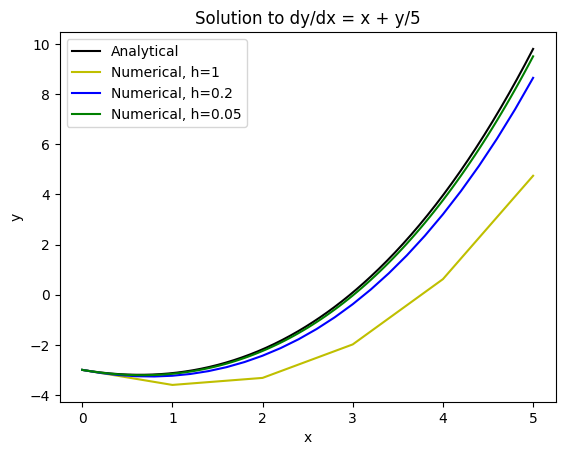

In [537]:
# Set the plot settings
plt.title("Solution to dy/dx = x + y/5")
plt.xlabel("x")
plt.ylabel("y")
interval = [0, 5]

# Plot each of the graphs, remembering to zip and unzip the points into a tuple of x points and a tuple of y points
plt.plot(*zip(*analytical_solution(interval)), color='k', label='Analytical')
plt.plot(*zip(*numerical_solution(1, interval)), color='y', label='Numerical, h=1')
plt.plot(*zip(*numerical_solution(0.2, interval)), color='b', label='Numerical, h=0.2')
plt.plot(*zip(*numerical_solution(0.05, interval)), color='g', label='Numerical, h=0.05')

plt.legend()
plt.show()

<h2>Comparison of Results</h2>
<p>The next set of code will be used to produce plots an absolute error plot and a log-log plot.</p>

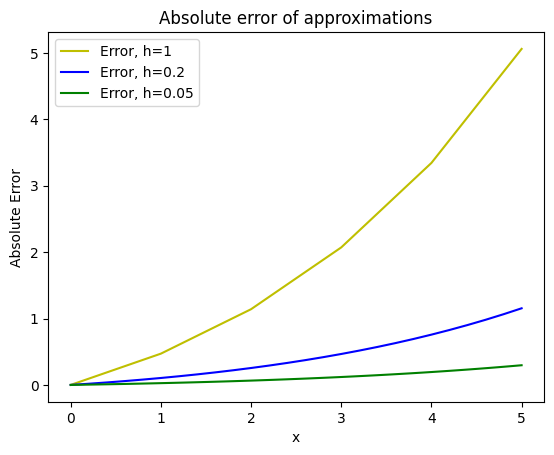

C:\Users\Lozing\AppData\Local\Temp\ipykernel_2480\1546509633.py:43: RuntimeWarning: invalid value encountered in log
  log_actual = np.log(find_actual(value[0]))
C:\Users\Lozing\AppData\Local\Temp\ipykernel_2480\1546509633.py:44: RuntimeWarning: invalid value encountered in log
  log_approx = np.log(value[1])


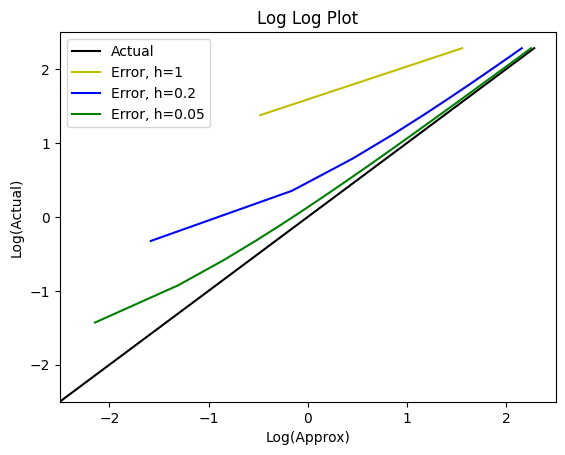

In [538]:
def find_actual(x):
    '''
    Finds the actual value of y at x

    Parameters:
    ----------
    x:
        - The value to find y at

    Returns:
    -------
    The y value at x
    '''
    return -5*x-25+22*np.exp(x/5)

def error(approx):
    '''
    Calculate the error between the acutal values and the approximated values

    Paramters:
    ----------
    actual:
        - A list of points that are the actual values from the analytical solution

    approx:
        - A list of points that are approximated by Euler's method

    Returns:
    --------
    A list of points containing errors for each step taken in when approximating
    '''
    errors = []
    
    for value in approx:
        e = abs(find_actual(value[0]) - value[1])
        errors.append((value[0], e))
    
    return errors

def loglog(approx):
    logs = []
    for value in approx:
        log_actual = np.log(find_actual(value[0]))
        log_approx = np.log(value[1])
        logs.append((log_approx, log_actual))

    return logs

# Set the plot settings
plt.title("Absolute error of approximations")
plt.xlabel("x")
plt.ylabel("Absolute Error")

plt.plot(*zip(*error(numerical_solution(1, interval))), color='y', label='Error, h=1')
plt.plot(*zip(*error(numerical_solution(0.2, interval))), color='b', label='Error, h=0.2')
plt.plot(*zip(*error(numerical_solution(0.05, interval))), color='g', label='Error, h=0.05')
plt.legend()
plt.show()

# Set the plot settings
plt.title("Log Log Plot")
plt.xlabel("Log(Approx)")
plt.ylabel("Log(Actual)")
plt.xlim([-2.5, 2.5])
plt.ylim([-2.5, 2.5])

plt.plot(*zip(*loglog(analytical_solution(interval))), color='k', label='Actual')
plt.plot(*zip(*loglog(numerical_solution(1, interval))), color='y', label='Error, h=1')
plt.plot(*zip(*loglog(numerical_solution(0.2, interval))), color='b', label='Error, h=0.2')
plt.plot(*zip(*loglog(numerical_solution(0.05, interval))), color='g', label='Error, h=0.05')
plt.legend()
plt.show()
    

<p>From the initial plot, it is quite obvious that when h increases the predicition gets worse, this is because you end up taking a bigger step in a direction that is slightly wrong.<br>
The absolute error graph shows that all of the approximations have a slight error, as we would expect, which grows over the course of the approximation. It shows that h=0.05 is the best of the three approximations since it consistently has the lowest absolute error.<br>
The log-log plot renforces the idea that h=0.05 is the best of the approximations because it has the gradient closest to 1, which we would expect for a first order linear equation. Since the log-log gradient for h=1 shows a gradient that is the furthest from 1, we can conclude that the error will grow the quickest compared to the other approximations and therefore is unreliable very quickly.</p>